In [3]:
#removing missing values, duplicates, URLs, special characters, stop words, and applying stemming.

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# USEING GROUPBY METHOD FOR TOP  PRODUCTS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# CREATE DATAFRAME ONLY THE TOP PRODUCTS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)


print(df_top_products)


# COUNT POSSITIVE AND NEGATIVE REVIEWS EACH PRODUCTS

product_sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size().unstack(fill_value=0)


print(product_sentiment_counts)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            product_name product_price Rate  \
0      cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
1      MILTON Thermosteel Flip Lid 500 ml FlaskPack o...           648    4   
2      VICTORY Professional Wrist Wrap Band , Wrist S...           109    5   
3      Seagate One Touch with Password Protection for...          5599    5   
4      Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...         13999    4   
...                                                  ...           ...  ...   
62631  VICTORY Professional Wrist Wrap Band , Wrist S...           109    5   
62632  Prestige Plus Atlas 750 W Juicer Mixer Grinder...          3249    4   
62633  TP-Link Archer C20 AC WiFi 750 MBPS Wireless R...          1599    4   
62634  PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...          6999    5   
62635  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...          8499    5   

                           Review  \
0             

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            product_name product_price Rate  \
0      HAIR & CARE Triple Blend Damage Repair Non-Sti...           113    5   
1      POCO C31 (Royal Blue, 64 GB)?ÐÒÐÒ?ÐÒÐÒ...          7499    2   
2      APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...         29990    5   
3      Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...           218    4   
4      cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
...                                                  ...           ...  ...   
62631  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...          8499    4   
62632  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...         13999    4   
62633  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
62634  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...         30999    2   
62635  Flipkart SmartBuy CFXB18 Electric Rice Cooker?...          1599    5   

                     Review  \
0            classi 

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


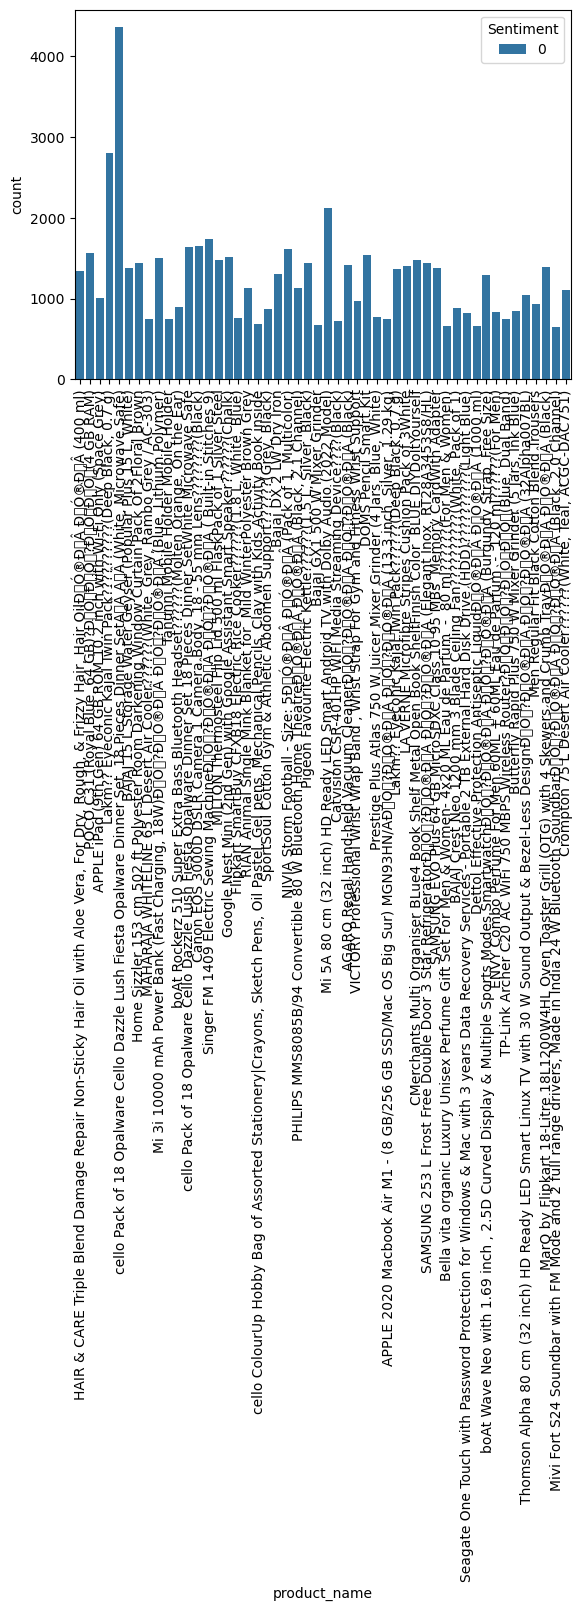

In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns


# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# USEING GROUPBY METHOD FOR TOP  PRODUCTS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# CREATE DATAFRAME ONLY THE TOP PRODUCTS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)


print(df_top_products)


# CREATE A BAR
sns.countplot(x='product_name', hue='Sentiment', data=df_top_products)
plt.xticks(rotation=90)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         product_name  product_price  \
49  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
22  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
28  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
39  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
10  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

    Sentiment  Review Count  
49        0.0          4362  
22        0.0          2805  
28        0.0          2122  
39        0.0          1743  
10        0.0          1646  
                                            product_name  product_price Rate  \
0      Butterfly Rapid Plus 750 W Mixer Grinder (5 Ja...         3399.0    5   
1      PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...         6999.0    5   
2      Google Nest Mini (2nd Gen) with Google Assista...         3499.0    5   
3      BAJAJ 15 L Storage Water Geyser (Popular Plus ...         54

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


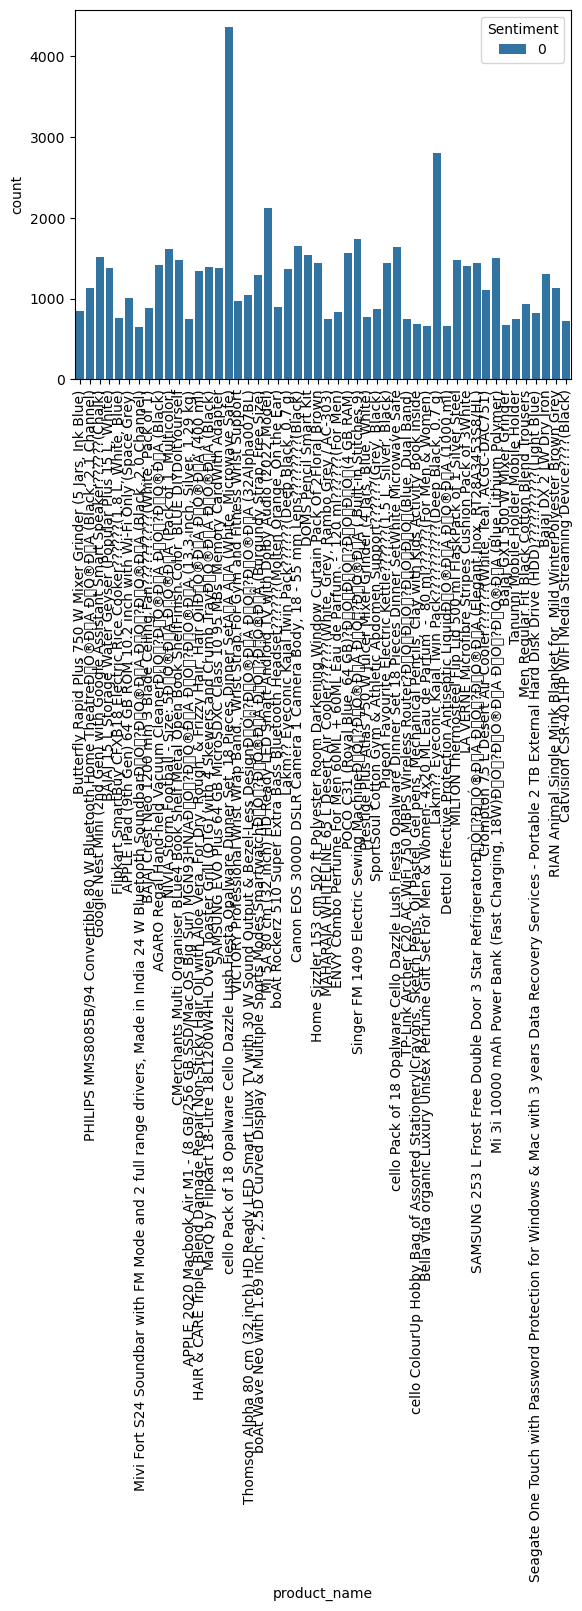

In [5]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns


# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# REMOVE MISSING VALUES 
df.dropna(inplace=True)

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# REMOVE ANY URLS
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# REMOVE SPECIAL CHARECTER
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# CONVERT ALL TEXT TO LOWERCASE
df['Review'] = df['Review'].apply(lambda x: x.lower())

# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# STEMMING
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# SENTIMENT LEBELS (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# USEING GROUPBY METHOD FOR TOP  PRODUCTS
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# CREATE DATAFRAME ONLY THE TOP PRODUCTS
df_top_products = df[df['product_name'].isin(top_products)]

# SHUFFLES  THE ROWS OF THE DATAFRAME
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)


# CONVERT PRODUCT_PRICE TO NUMERIC
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# BEST SELLING PRODUCTS NAME AND PRICE WITH SENTIMENT
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment', 'product_price'], ascending=False, inplace=True)
print(best_selling_product.head())


print(df_top_products)


sns.countplot(x='product_name', hue='Sentiment', data=df_top_products)
plt.xticks(rotation=90)
plt.show()